<a href="https://colab.research.google.com/github/chourouk-sun/sales-analysis/blob/main/Data_Analyst_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Updated_sales.csv to Updated_sales (4).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Updated_sales.csv')

In [ ]:
df.head()        # First 5 rows
df.info()        # Column names & data types
df.columns       # List of column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30394 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30307 non-null  object
 1   Product           30307 non-null  object
 2   Quantity Ordered  30307 non-null  object
 3   Price Each        30307 non-null  object
 4   Order Date        30307 non-null  object
 5   Purchase Address  30307 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,30307,30307,30307,30307,30307,30307
unique,29019,20,9,24,23316,27854
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,61,3556,27405,3556,61,61


In [ ]:
df.isnull().sum()

,0
Order ID,87
Product,87
Quantity Ordered,87
Price Each,87
Order Date,87
Purchase Address,87


In [ ]:
print(df.isnull().sum())

Order ID            87
Product             87
Quantity Ordered    87
Price Each          87
Order Date          87
Purchase Address    87
dtype: int64


In [ ]:
print(df['Order Date'].dtype)
print(df['Order Date'].head())

object
0    04/19/19 08:46
1               NaN
2    04/07/19 22:30
3    04/12/19 14:38
4    04/12/19 14:38
Name: Order Date, dtype: object


In [ ]:
import pandas as pd

# Convert to numeric and datetime types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

<ipython-input-234-3004383243>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [ ]:
# CONVERTING
print(df['Order Date'].dtype)
print(df['Order Date'].head())

datetime64[ns]
0   2019-04-19 08:46:00
1                   NaT
2   2019-04-07 22:30:00
3   2019-04-12 14:38:00
4   2019-04-12 14:38:00
Name: Order Date, dtype: datetime64[ns]


In [ ]:
print(df['Order Date'].isna().sum())

148


In [ ]:
# rows where conversion failed
print(df[df['Order Date'].isna()][['Order Date']].head())

     Order Date
1           NaT
356         NaT
519         NaT
735         NaT
1149        NaT


In [ ]:
#  missing values in the entire DataFrame
print(df.isnull().sum())

Order ID             87
Product              87
Quantity Ordered    148
Price Each          148
Order Date          148
Purchase Address     87
dtype: int64


In [ ]:
# Number of missing (NaT) in 'Order Date'
print(df['Order Date'].isnull().sum())

148


In [ ]:
df.dropna(subset=['Quantity Ordered', 'Price Each', 'Order Date', 'Order ID', 'Product'], inplace=True)

In [ ]:
print(df.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [ ]:
# Drop rows with missing critical non-converted fields
df.dropna(subset=['Order ID', 'Product'], inplace=True)

# drop rows missing address (if location analysis is needed)
df.dropna(subset=['Purchase Address'], inplace=True)


In [ ]:
# After dropping
print("After dropping:", len(df))

After dropping: 30246


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#check if the duplicated are removed correctely
print("Duplicate rows after:", df.duplicated().sum())

Duplicate rows after: 0


In [ ]:
#Remove any remaining invalid or missing rows
df.dropna(subset=['Quantity Ordered', 'Price Each', 'Order Date', 'Order ID', 'Product'], inplace=True)

#**ADING NEW COLUMN 4 BETTER ANALYSIS**


In [ ]:
# add Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
print(df.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address   Sales  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   23.90  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215   99.99  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  600.00  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   11.99  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001   11.99  


In [ ]:
#extract date parts
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour
df['Day of Week'] = df['Order Date'].dt.dayofweek  # 0 = Monday

In [ ]:
print(df.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address   Sales  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   23.90      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215   99.99      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  600.00      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   11.99      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001   11.99      4   

   Hour  Day of Week  
0     8            4  
2    22            6  
3    14            4  
4    1

In [ ]:
#extract adress parts
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

In [ ]:
print(df.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address   Sales  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   23.90      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215   99.99      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  600.00      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   11.99      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001   11.99      4   

   Hour  Day of Week         City State  
0     8            4       Dallas    TX  
2    22       

#**Visualization**

<Axes: title={'center': 'Daily Sales'}, xlabel='Day of Week'>

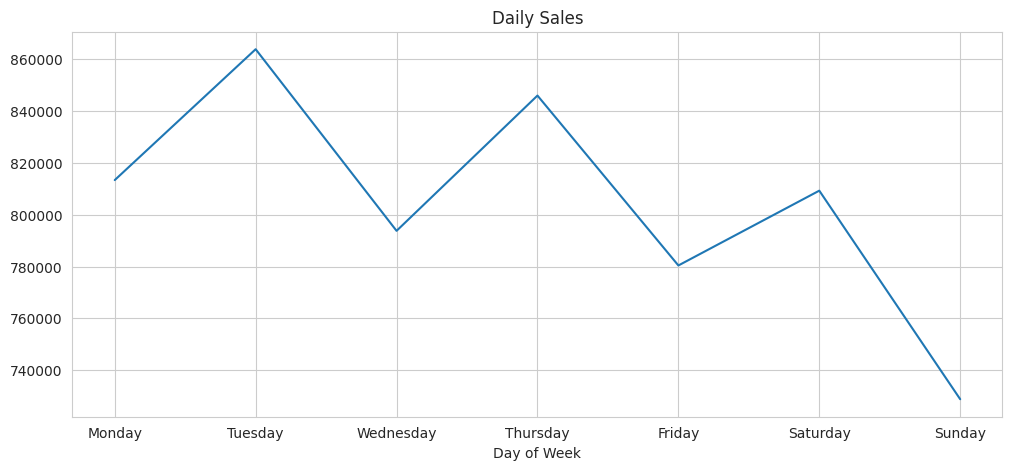

In [ ]:
df['Day of Week'] = df['Order Date'].dt.day_name()
daily_sales = df.groupby('Day of Week')['Sales'].sum()

# ensure correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(days_order)
daily_sales.plot(title='Daily Sales', figsize=(12, 5))

<Axes: title={'center': 'Daily Sales'}, xlabel='Day of Week'>

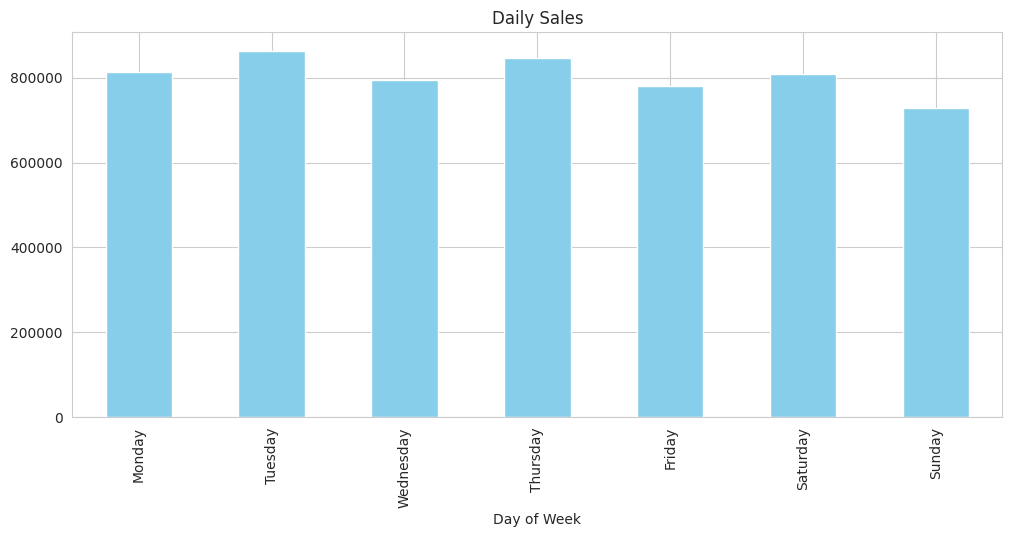

In [ ]:
# daily plot 2nd
daily_sales = df.groupby('Day of Week')['Sales'].sum()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(day_order)

# Plot as bar chart
daily_sales.plot(kind='bar', title='Daily Sales', figsize=(12, 5), color='skyblue')

In [ ]:
print(daily_sales)

Day of Week
Monday       813389.11
Tuesday      863909.56
Wednesday    793797.99
Thursday     846017.86
Friday       780426.29
Saturday     809303.35
Sunday       728790.49
Name: Sales, dtype: float64


<Axes: title={'center': 'Monthly Sales'}, xlabel='Month'>

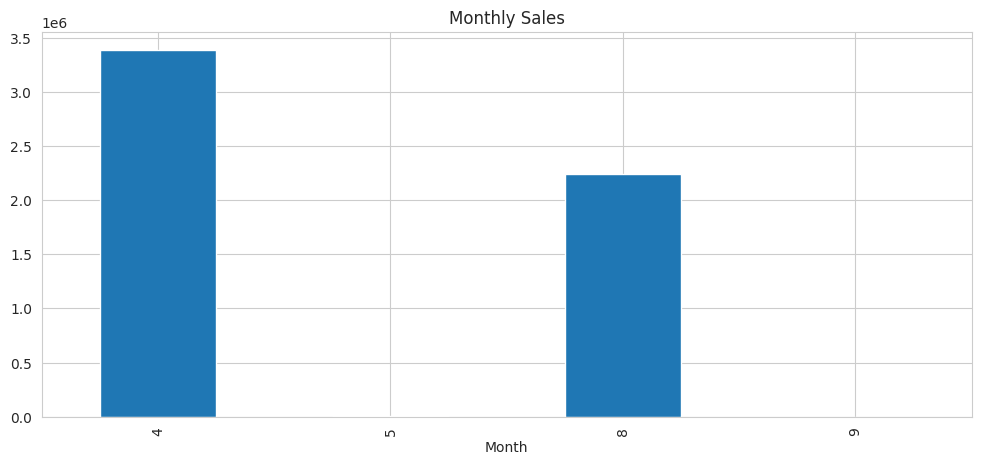

In [ ]:
# Monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales', figsize=(12, 5))

In [ ]:
print(monthly_sales)

Month
4    3384047.56
5      10559.29
8    2238931.06
9       2096.74
Name: Sales, dtype: float64


In [ ]:
# Number of unique products
num_products = df['Product'].nunique()
print(f"Number of unique products: {num_products}")

Number of unique products: 19


In [ ]:
product_list = df['Product'].unique()
print(product_list)

['USB-C Charging Cable' 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor']


<Axes: title={'center': 'Top Products by Revenue'}, xlabel='Product'>

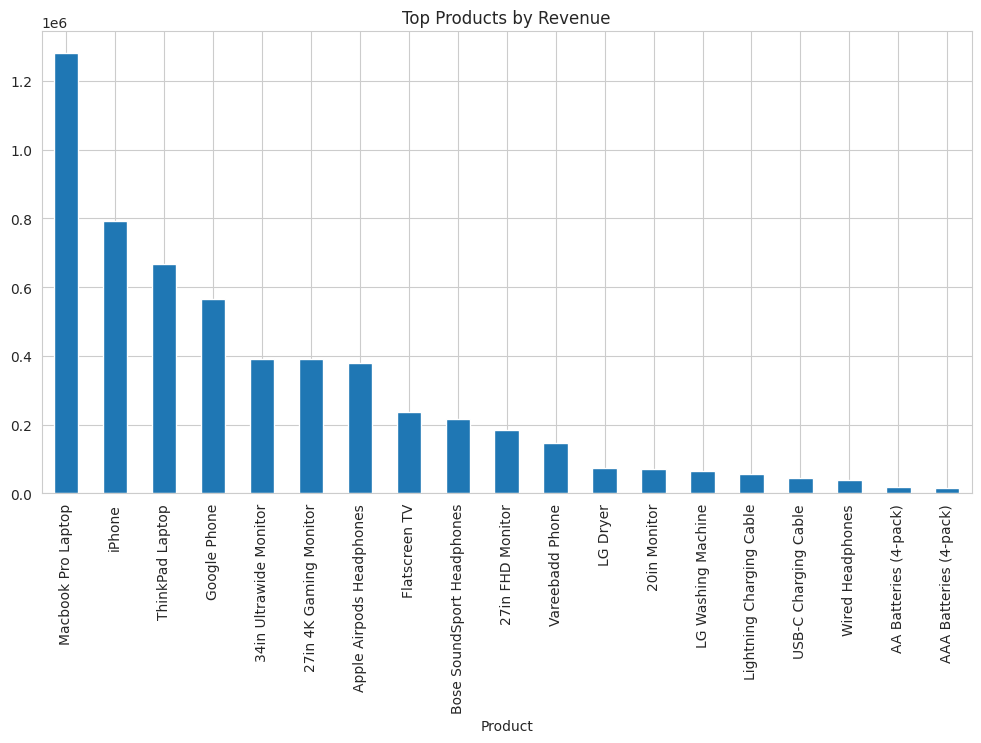

In [ ]:
#Which Products Generate the Most Revenue?
product_revenue = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
product_revenue.plot(kind='bar', title='Top Products by Revenue', figsize=(12, 6))

<Axes: title={'center': 'Best-Selling Products (by Quantity)'}, xlabel='Product'>

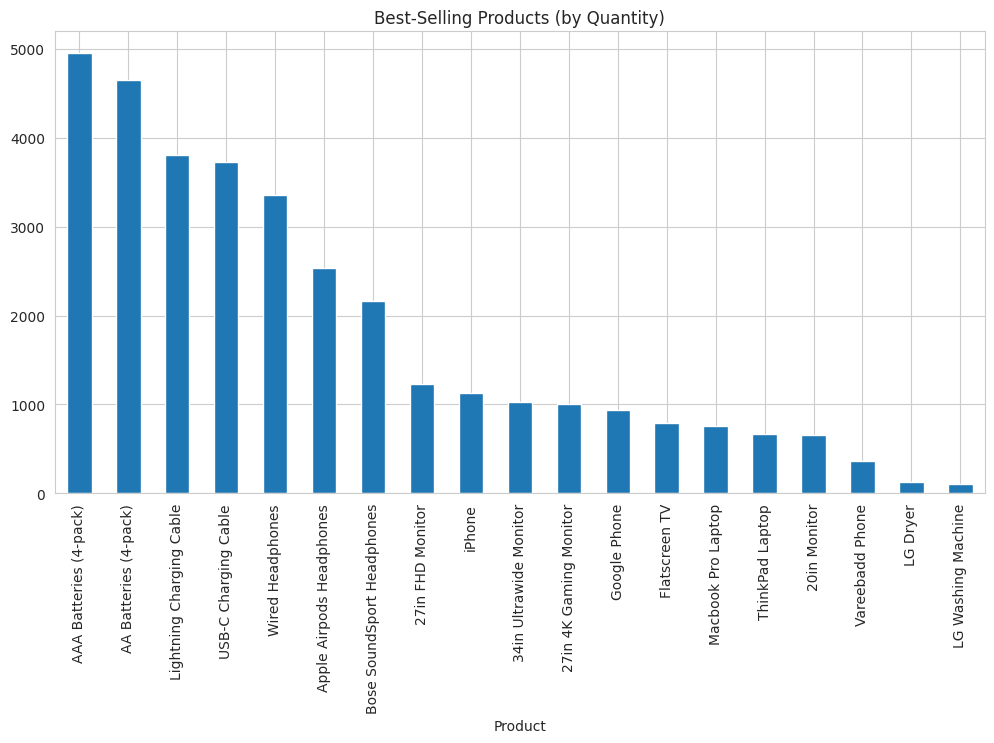

In [ ]:
#Best-Selling Product by Quantity
best_selling = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
best_selling.plot(kind='bar', title='Best-Selling Products (by Quantity)', figsize=(12, 6))

In [ ]:
product_quantity = df.groupby('Product')['Quantity Ordered'].sum()
#Top-Selling Products
print(product_quantity)

Product
20in Monitor                   656.0
27in 4K Gaming Monitor        1003.0
27in FHD Monitor              1228.0
34in Ultrawide Monitor        1031.0
AA Batteries (4-pack)         4647.0
AAA Batteries (4-pack)        4950.0
Apple Airpods Headphones      2532.0
Bose SoundSport Headphones    2165.0
Flatscreen TV                  789.0
Google Phone                   941.0
LG Dryer                       123.0
LG Washing Machine             109.0
Lightning Charging Cable      3803.0
Macbook Pro Laptop             753.0
ThinkPad Laptop                667.0
USB-C Charging Cable          3723.0
Vareebadd Phone                363.0
Wired Headphones              3353.0
iPhone                        1133.0
Name: Quantity Ordered, dtype: float64


# Sales by Hour for Each City

<Figure size 1500x600 with 0 Axes>

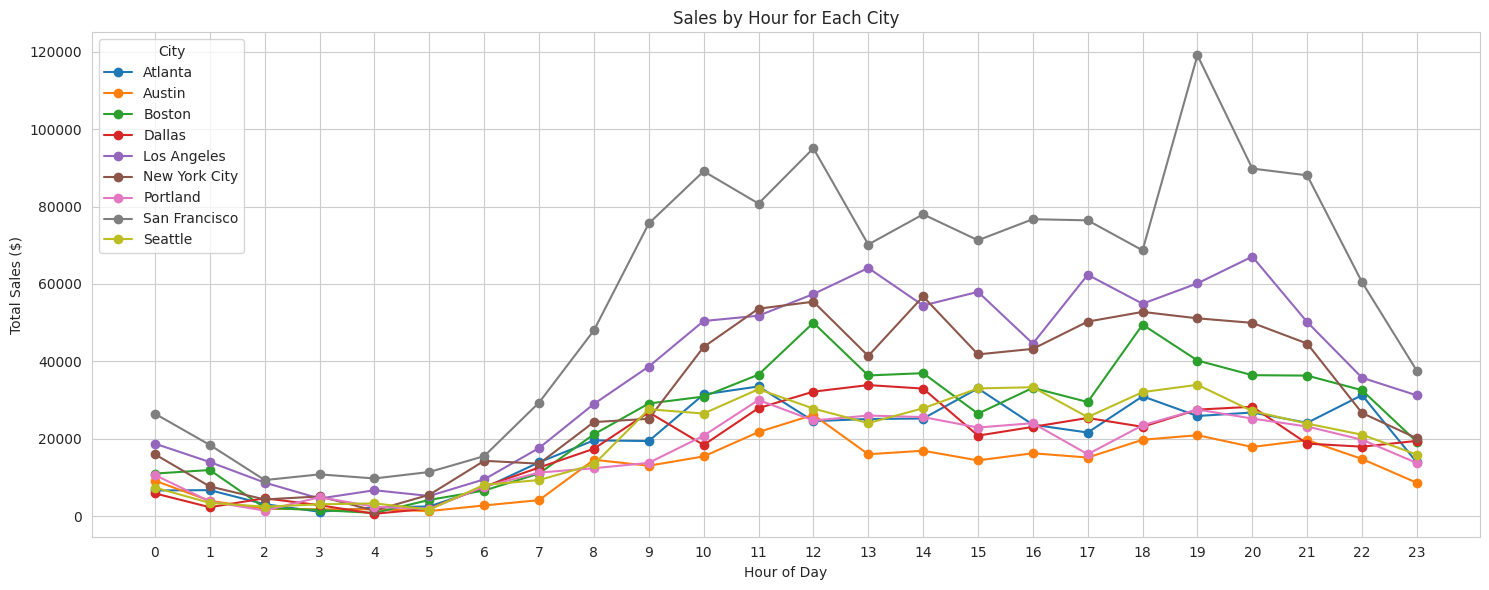

In [ ]:
import matplotlib.pyplot as plt

# Group by Hour and City, then sum sales
hour_city_sales = df.groupby(['Hour', 'City'])['Sales'].sum().unstack()

# Plot
plt.figure(figsize=(15, 6))
hour_city_sales.plot(kind='line', marker='o', figsize=(15,6))

plt.title('Sales by Hour for Each City')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.legend(title='City')
plt.xticks(range(0, 24))  # Show all 24 hours
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Sales by City'}, xlabel='City'>

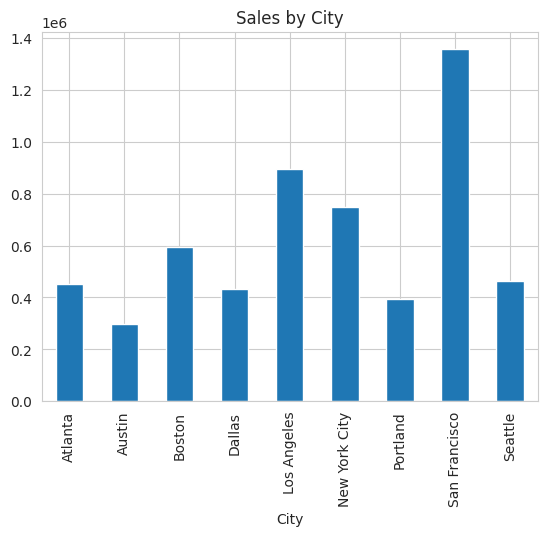

In [ ]:
city_sales = df.groupby('City')['Sales'].sum()
city_sales.plot(kind='bar', title='Sales by City')
#sales by city

In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
city_sales = df.groupby('City')['Sales'].sum()
#Sales by City
print(city_sales)


City
Atlanta           453695.68
Austin            298247.21
Boston            593725.52
Dallas            432379.00
Los Angeles       894947.08
New York City     748830.79
Portland          393252.85
San Francisco    1355726.22
Seattle           464830.30
Name: Sales, dtype: float64


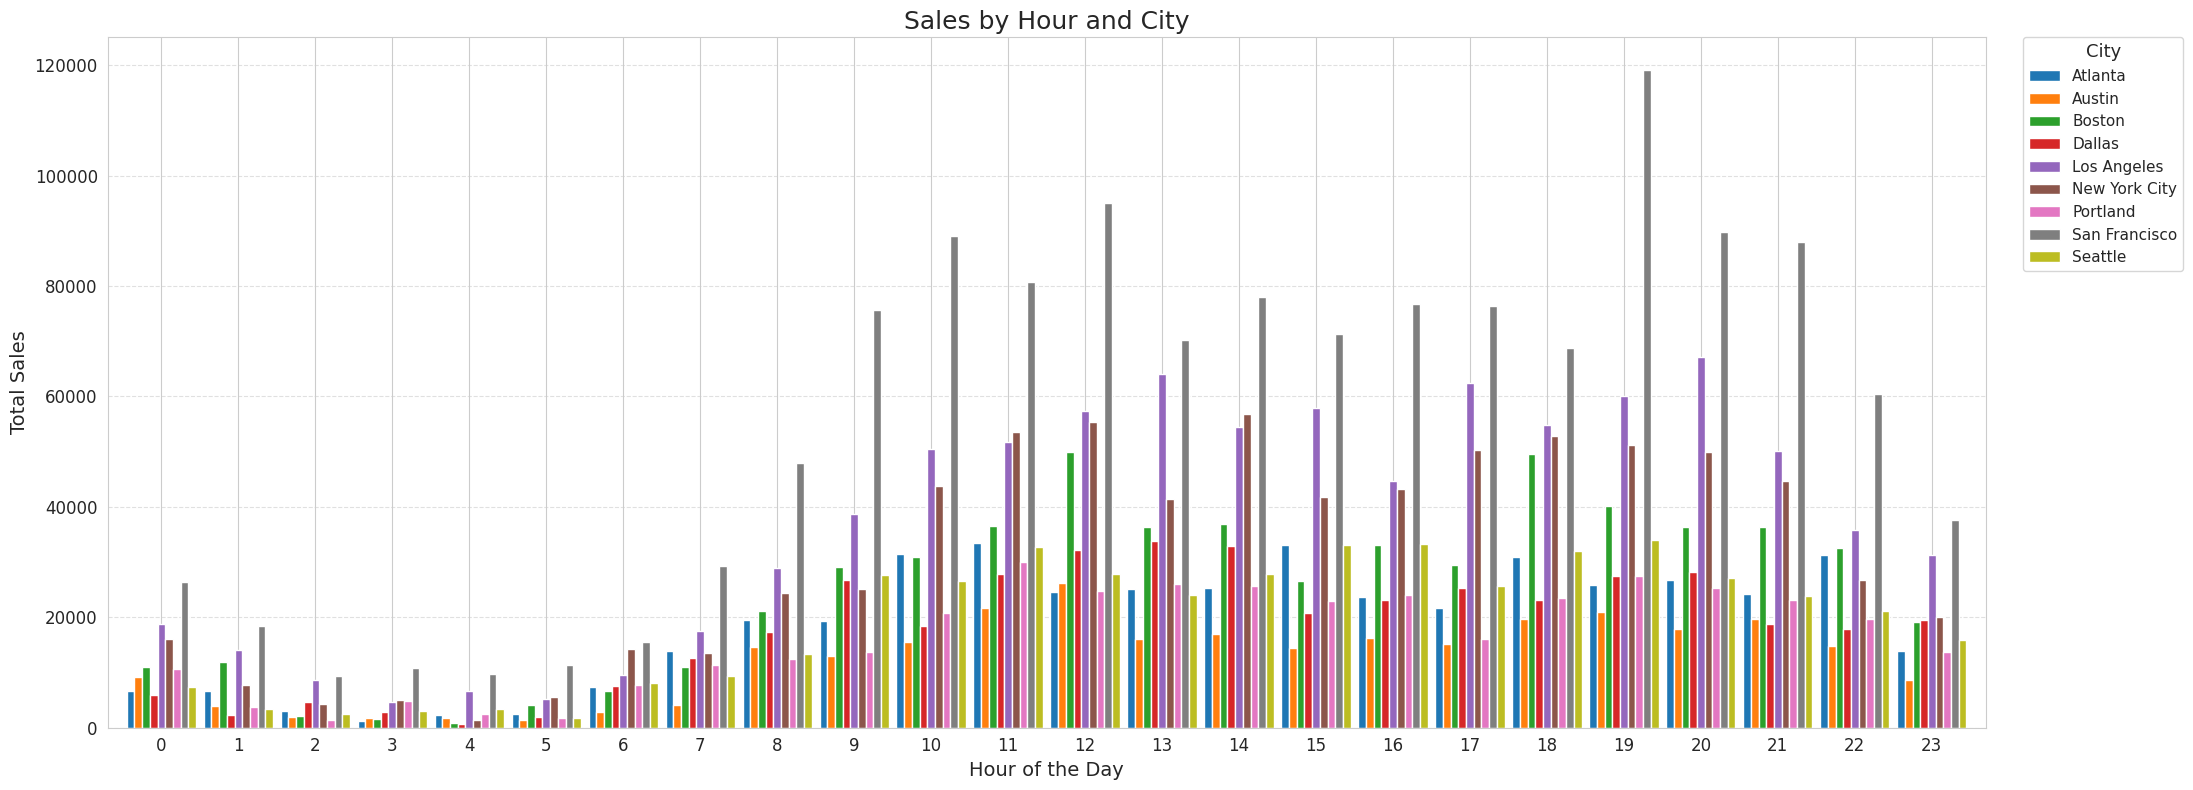

In [ ]:
# Plot with larger figure and adjusted bar width
grouped.plot(kind='bar', figsize=(22, 8), width=0.9)

plt.title('Sales by Hour and City', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legend moved outside, slightly resized
plt.legend(title='City', title_fontsize=13, fontsize=11,
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()


# order by hour

<Axes: title={'center': 'Orders by Hour'}, xlabel='Hour'>

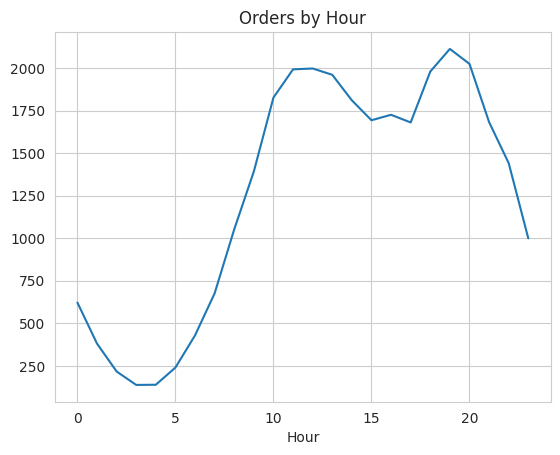

In [ ]:
orders_by_hour = df.groupby('Hour')['Order ID'].count()
orders_by_hour.plot(kind='line', title='Orders by Hour')
#order per hour

In [ ]:
print(df['Month'].unique())

[4 5 8 9]


In [ ]:
print(df['Season'].unique())

['Spring' 'Summer' 'Autumn']


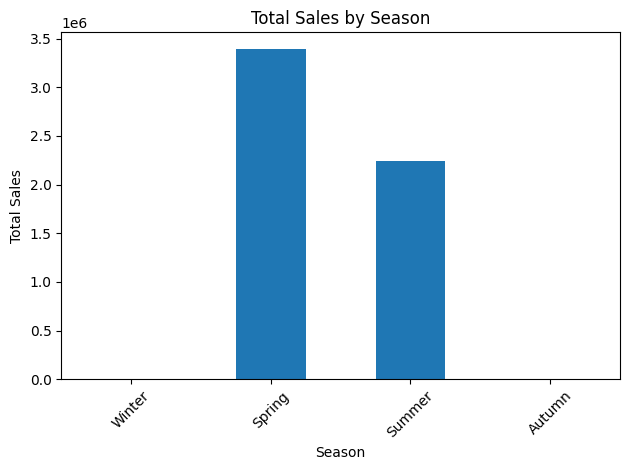

In [ ]:
#sales for each season

seasonal_sales.plot(kind='bar', title='Total Sales by Season')
plt.ylabel('Total Sales')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.download('cleaned_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv('cleaned_sales_data.csv', index=False)